可以研究诸如

$$
\begin{bmatrix}
-1 & -1 & -1 \\
-1 & 9 & -1 \\
-1 & -1 & -1
\end{bmatrix}
$$

之类的滤波器地频率响应

由时（空）域到频域的变换为：

$$
X(\omega_1,\omega_2) = \sum_{n_1=-\infty}^\infty \sum_{n_2=-\infty}^\infty x(n_1,n_2) e^{-j\omega_1n_1} e^{-j\omega_2n_2}
$$

由频域到空域的变换为:

$$
x(n_1,n_2) \frac{1}{4\pi^2} \int_{-\pi}^\pi \int_{-\pi}^\pi X(\omega_1,\omega_2) e^{j\omega_1n_1}e^{j\omega_2n_2}d\omega_1d\omega_2
$$

不难看出一个特定的频率组合对应的频率的复数（通常分解为模和幅角看待），即响应会比较“大”当且仅当一个类似的趋势在那个频率反复出现，相反的情况就是这个频率看过去空域情况大致上是随机的，没什么规律，这时频域响应应该接近0.

2d fourier变换虽然也可以做空域上的均值滤波之类的操作，（空域上的卷积相当于频域的直接乘）但并不会很快，因为均值滤波这种在频域上看并不自然，所以其响应不会截断，精确计算和空域上直接算大致相同。它的优势在于定义一些频域上自然的，可以截断的滤波器，这种滤波器反转到空域上则不自然，会有无限大的范围。

下面是课上的一个算例，我们验证以下这个结果，然后可视化，计算另外两个结果。它们被用来观察空域上一些经典滤波器在频域上的“效果”，如为何叫它们高通或低通滤波器。

$$
H(\omega_1,\omega_2) = \sum_{n_1=-\infty}^\infty \sum_{n_2=-\infty}^\infty h(n_1,n_2) e^{-j\omega_1n_1} e^{-j\omega_2n_2}
$$

$$
h(n_1,n_2)=\begin{bmatrix}
0 & 1/6 & 0 \\
1/6 & 1/3 & 1/6 \\
0 & 1/6 & 0\\
\end{bmatrix}
$$

$$
\begin{align*}
H(\omega_1,\omega_2) &= 1/3h(0,0) + h(1,0) e^{-j\omega_1} + h(-1,0) e^{j\omega_1} + h(0,1) e^{-j\omega_2} + h(0,-1) e^{j\omega_2} \\
&= 1/3 + 1/6 e^{-j\omega_1} + 1/6 e^{j\omega_1} + 1/6 e^{-j\omega_2} + 1/6 e^{j\omega_2} \\
&= 1/3 + 1/6 (\cos(\omega_1)-\sin(\omega1)) + 1/6 (\cos(\omega_1) + \sin(\omega_1)) + 1/6(\cos(\omega_2) - \sin(\omega_2)) + 1/6(\cos(\omega_2)+\sin(\omega_2)) \\
&= 1/3 + 1/3\cos(\omega_1) + 1/3\cos(\omega_2)
\end{align*}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [14]:
r = 1.4
_omega1 = np.linspace(-r*np.pi,r*np.pi,100)
_omega2 = np.linspace(-r*np.pi,r*np.pi,100)
omega1, omega2 = np.meshgrid(_omega1, _omega2)
z = 1/3 + 1/3*np.cos(omega1) + 1/3*np.cos(omega2)

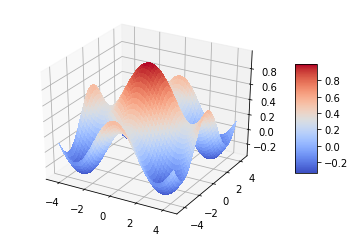

In [15]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(omega1, omega2, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


$$
h(n_1,n_2)=\begin{bmatrix}
-1 & -1 & -1 \\
-1 & 9  & -1 \\
-1 & -1 & -1\\
\end{bmatrix}
$$

In [18]:


_omega1 = np.linspace(-10,10,100)
_omega2 = np.linspace(-10,10,100)
omega1, omega2 = np.meshgrid(_omega1, _omega2)
z = 9 - 2*(np.cos(omega1) + np.cos(omega2) + 2*np.cos(omega1+omega2) + 2*np.cos(omega1 - omega2))

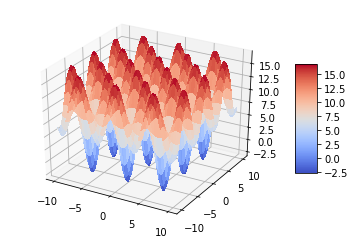

In [19]:
fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(omega1, omega2, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


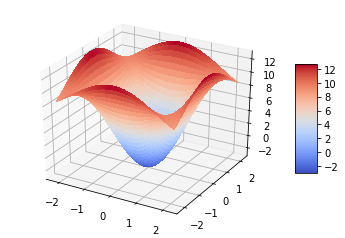

In [25]:
r = 0.7
_omega1 = np.linspace(-r*np.pi,r*np.pi,100)
_omega2 = np.linspace(-r*np.pi,r*np.pi,100)
omega1, omega2 = np.meshgrid(_omega1, _omega2)
z = 9 - 2*(np.cos(omega1) + np.cos(omega2) + 2*np.cos(omega1+omega2) + 2*np.cos(omega1 - omega2))

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(omega1, omega2, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


Examination Paper Problems

\begin{bmatrix}
1/9 & 1/9 & 1/9 \\
1/9 & 1/9 & 1/9 \\
1/9 & 1/9 & 1/9 
\end{bmatrix}

$$1/9
\begin{bmatrix}
-1 & -1 & -1 \\
-1 & 17 & -1 \\
-1 & -1 & -1 
\end{bmatrix}
$$

$$
H(\omega_1,\omega_2) = 1/9 (h(0,0) + h(1,0)e^{-j\omega_1} +  h(-1,0)e^{j\omega_1} + h(0,1)e^{-j\omega_2} + h(0,-1)e^{j\omega_2} + h(1,1) e^{-j\omega_1}e^{-j\omega_2} + h(-1,-1) e^{j\omega_1}e^{j\omega_2} + h(-1,1)e^{j\omega_1}e^{-j\omega_2} + h(1,-1)e^{-j\omega_1}e^{j\omega_2}) 
$$

$$
1/9 (1+ e^{-j\omega_1} +  e^{j\omega_1} + e^{-j\omega_2} + e^{j\omega_2} + e^{j(-\omega_1-\omega_2)} + e^{j(\omega_1+\omega_2)} + e^{j(\omega_1-\omega_2)} + e^{j(-\omega_1+\omega_2)})
$$

$$
1/9 (1 + 2\cos(\omega_1) + 2\cos(\omega_2) + 2\cos(\omega_1+\omega_2) + 2\cos(\omega_1-\omega_2))
$$

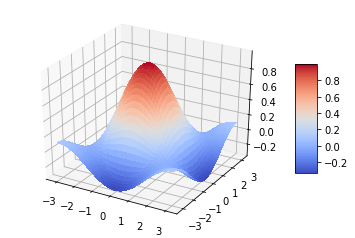

In [27]:
r = 1.0
_omega1 = np.linspace(-r*np.pi,r*np.pi,100)
_omega2 = np.linspace(-r*np.pi,r*np.pi,100)
omega1, omega2 = np.meshgrid(_omega1, _omega2)
z = 1/9 * (1 + 2*np.cos(omega1) + 2*np.cos(omega2) + 2*np.cos(omega1+omega2) + 2*np.cos(omega1 - omega2))

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(omega1, omega2, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

$$
1/9 (17- e^{-j\omega_1} -  e^{j\omega_1} - e^{-j\omega_2} - e^{j\omega_2} - e^{j(-\omega_1-\omega_2)} - e^{j(\omega_1+\omega_2)} - e^{j(\omega_1-\omega_2)} - e^{j(-\omega_1+\omega_2)})
$$

$$
1/9 (17 - 2\cos(\omega_1) - 2\cos(\omega_2) - 2\cos(\omega_1+\omega_2) - 2\cos(\omega_1-\omega_2))
$$

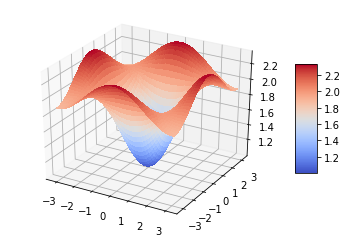

In [28]:
r = 1.0
_omega1 = np.linspace(-r*np.pi,r*np.pi,100)
_omega2 = np.linspace(-r*np.pi,r*np.pi,100)
omega1, omega2 = np.meshgrid(_omega1, _omega2)
z = 1/9 * (17 - 2*np.cos(omega1) - 2*np.cos(omega2) - 2*np.cos(omega1+omega2) - 2*np.cos(omega1 - omega2))

fig = plt.figure()
ax = fig.gca(projection='3d')

surf = ax.plot_surface(omega1, omega2, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()